In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.tree import plot_tree
import time
import seaborn as sns
import joblib

#Cross Validation
from sklearn.model_selection import cross_val_score

In [4]:
# Load CSV files
train_data = pd.read_csv(r'F:\Kabir\CSUN\R\training_data_final.csv')
test_data = pd.read_csv(r'F:\Kabir\CSUN\R\testing_data_final.csv')

In [5]:
train_data.head(2)

,sentiment_class,aake,aapki,aapse,abhorrent,ability,abject,able,abomination,abrasive,...,zoo,zoom,zoomedin,zoomers,zooming,zz,zürich,äckligt,åt,punctuation_percent
0,negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.26
1,positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [6]:
# Define your class mapping
class_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}

# Extract features (TF-IDF vectors) and labels from train data
X_train = train_data.drop(columns=['sentiment_class'])
y_train = train_data['sentiment_class'].map(class_mapping)

# Extract features (TF-IDF vectors) and labels from test data
X_test = test_data.drop(columns=['sentiment_class'])
y_test = test_data['sentiment_class'].map(class_mapping)

In [8]:
start_time = time.time()
print("started at : ", start_time)

# Initializing Model
rf_classifier = RandomForestClassifier()

# Defining hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

print("Time taken for Tuning : {} seconds".format(round(time.time() - start_time, 3)))
print("Ended at : ", time.time())

started at :  1714358860.7409124


C:\Users\isha\zoro_venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\isha\zoro_venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\isha\zoro_venv\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\isha\zoro_venv\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\isha\zoro_venv\Lib\site-packages\skle

Time taken for Tuning : 487.578 seconds
Ended at :  1714359348.3197155


In [9]:
# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


In [11]:
best_model = grid_search.best_estimator_
val_predictions = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, val_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.38      0.50       186
           1       0.62      0.80      0.70       138
           2       0.73      0.84      0.78       356

    accuracy                           0.71       680
   macro avg       0.70      0.67      0.66       680
weighted avg       0.71      0.71      0.69       680



In [13]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, val_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 71  30  85]
 [  4 111  23]
 [ 21  37 298]]


In [17]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, val_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7058823529411765


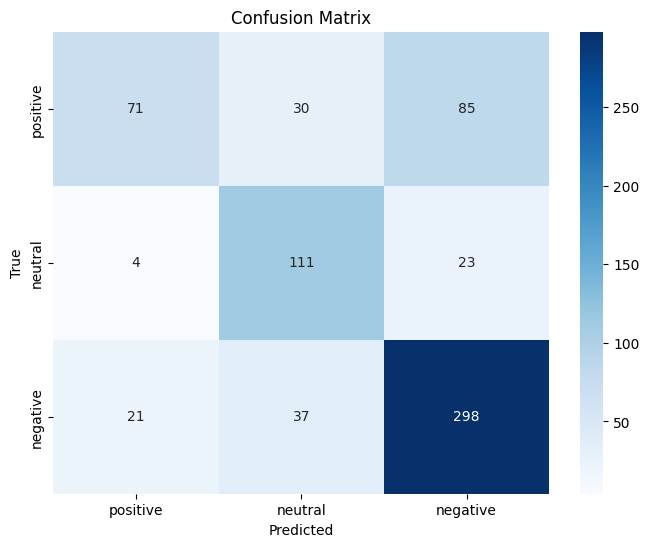

In [19]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
     

In [22]:
# Save the trained model
joblib.dump(best_model, r'F:\Kabir\CSUN\R\random_forest_model.joblib')

['F:\\Kabir\\CSUN\\R\\random_forest_model.joblib']

In [25]:
#  Perform cross-validation

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.6875     0.70220588 0.74033149 0.72744015 0.70718232]
Mean CV Score: 0.7129319683674575
